<a href="https://colab.research.google.com/github/dataqueenpend/DS_From_Zero_To_Hero/blob/gh-pages/Cluster_Analysis_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cluster Analysis in Python

In this course, you will be introduced to unsupervised learning through clustering using the SciPy library in Python.

This course covers pre-processing of data and application of hierarchical and k-means clustering.  After completing the course, you will be able to
* quickly apply various clustering algorithms on data,
* visualize the clusters formed 
* and analyze results.

##Introduction to Clustering

###Unsupervised learning: basics

 *How does the algorithm decide which articles are similar?*

 It is the result of an **unsupervised learning algorithm**.  It scans through the text of each article and based on frequently occurring terms, groups articles together. 

 *Labeled and unlabeled data*

Imagine you have a list of points with X and Y coordinates.

* If only the coordinates of the points are available and there is no other characteristic available to distinguish the data points, it is called **unlabeled data**.

* At the same time, if we associate each data point with a group beforehand, say normal and danger zones, we call it **labeled data**.

*What is unsupervised learning?*

It is an umbrella **term for a group of machine learning algorithms that are used to find patterns**.

 The data that is used in these algorithms is not labeled, classified or characterized prior to running the algorithm.

  The algorithm is run, therefore, to find and explain inherent structures within the data. Common unsupervised learning algorithms are:
  * clustering,
  * anomaly detections,
  * and neural networks. 
  
>  Clustering is used to group similar data points together.

*What is clustering?*

Clustering is the process of **grouping items with similar characteristics**. 

> The groups so formed are such that items in a single group are closer to each other in terms of some characteristics as compared to items in other clusters.

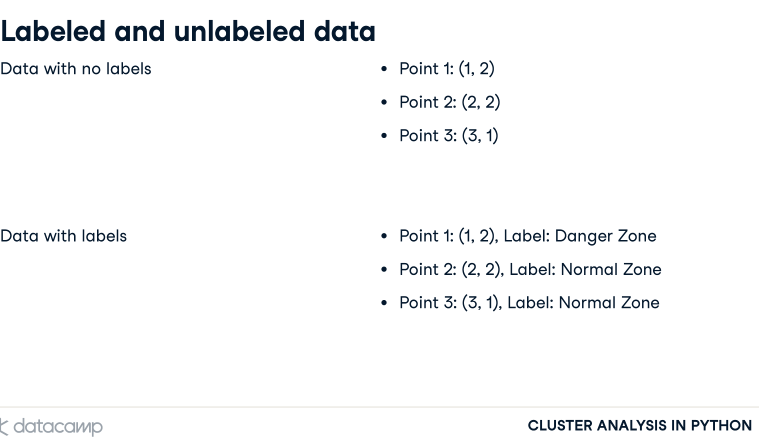


**Plotting data for clustering - Pokemon sightings**

We will plot the sightings of Pokemon in a park in the form of coordinates. 

* import the required class as plt
```
from matplotlib import pyplot as plt
```

* define the coordinates of points to be plotted in two lists - one each for x and y coordinates
```
x_coordinates = [80, 93, 86, 98, 86, 9, 15, 3, 10, 20, 44, 56, 49, 62, 44]
y_coordinates = [87, 96, 95, 92, 92, 57, 49, 47, 59, 55, 25, 2, 10, 24, 10]
```

> In this case, we have fifteen sightings that we would like to plot

* use the scatter method of the pyplot class, with the lists for the coordinates as arguments and the plot method to display the plot.

```
plt.scatter(x_coordinates, y_coordinates)
plt.show()
```
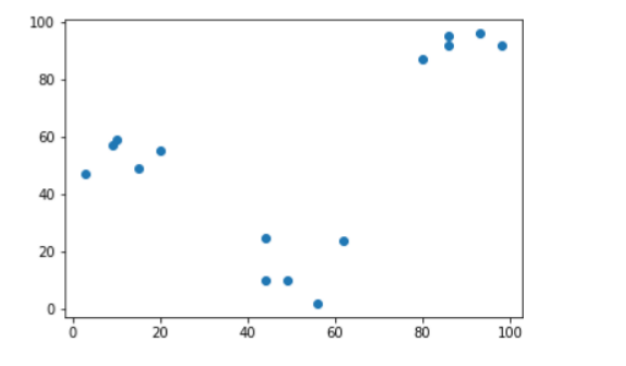

As a preliminary analysis before you perform any clustering analysis on the points, visualizing helps you understand how many natural clusters are present in the data. 

There are three clusters in the data, which are highlighted in the plot. By visualizing this data, you can infer with some confidence where the Pokemon actually are!

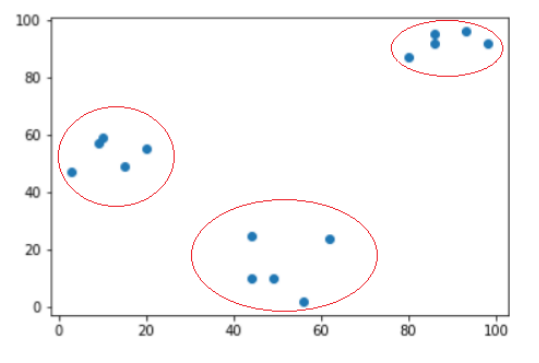

###Basics of cluster analysis

*What is a cluster?*

*  a cluster of news articles has similar words and word associations appearing in them.
* is segmentation of customers based on their spending habits - cluster of customers would exhibit similar spending habits.

*Clustering algorithms*:
* density based DBSCAN 
* Gaussian models
* hierarchical
* k-means clustering
* etc...

**Hierarchical clustering algorithm**

1. For demonstration purposes, let us consider 13 points on a 2D plane.

2. In the first step, all the points are considered as individual clusters. A cluster center is a mean of attributes of all data points in a cluster. In this case, cluster centers will have two attributes - the mean of x and y coordinates. At this stage, cluster centers of all clusters are the coordinates of the individual points.

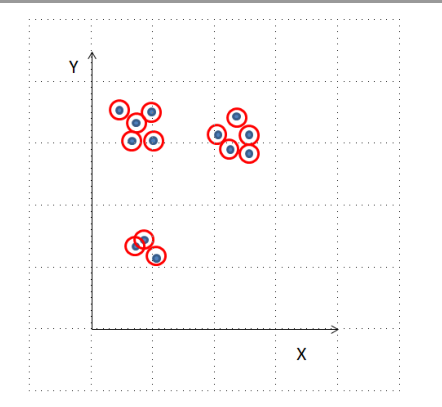

3. Next, the distances between all pairs of cluster centers are computed and **the two closest clusters are merged**. The cluster center of the merged cluster is then recomputed. In the example, two clusters on the bottom left have been merged. At this step, we are left with 12 clusters, one less than we started.

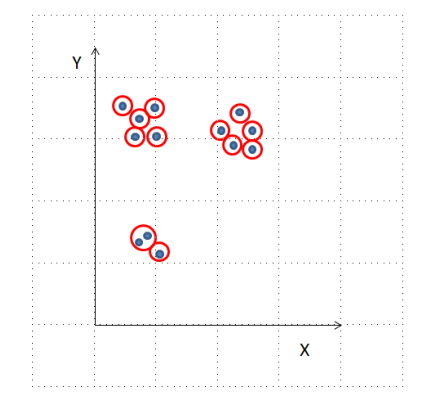

4. In the second step, **the clusters with the closest cluster centers are merged on the top left**. This process of merging the two closest clusters continues until we arrive at the desired clusters. At every step, the number of clusters reduces by one. As visible from the distribution of points, let us stop at three clusters.

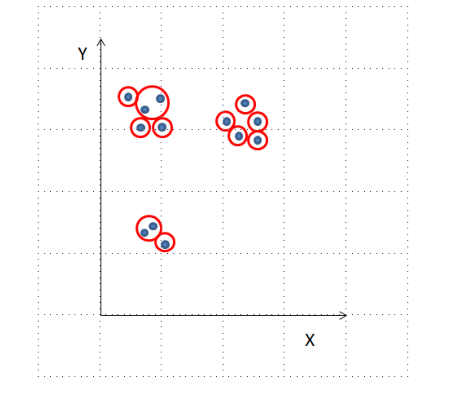

5. Finally, these are three clusters that you arrive at after the algorithm has run. 

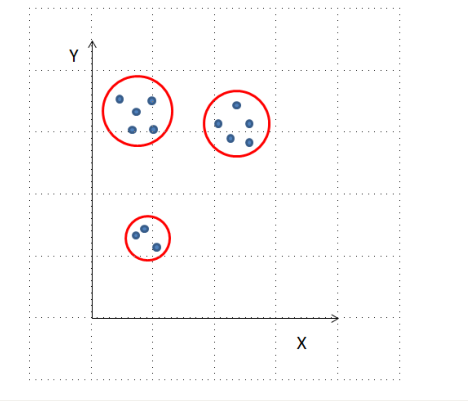

**Hierarchical clustering in SciPy**

The required methods for hierarchical clustering, linkage and fcluster, are stored in ```scipy.cluster.hierarchy```.

*  import pyplot and seaborn for visualization and pandas for data manipulation. A list of fifteen points with x and y coordinates is stored in a dataframe. 

```
from scipy.cluster.hierarchy import linkage, fcluster
from matplotlib import pyplot as plt
import seaborn as sns, pandas as pd

x_coordinates = [80.1, 93.1, 86.6, 98.5, 86.4, 9.5, 15.2, 3.4,
10.4, 20.3, 44.2, 56.8, 49.2, 62.5, 44.0]
y_coordinates = [87.2, 96.1, 95.6, 92.4, 92.4, 57.7, 49.4,
47.3, 59.1, 55.5, 25.6, 2.1, 10.9, 24.1, 10.3]

df = pd.DataFrame({'x_coordinate': x_coordinates,
'y_coordinate': y_coordinates})
```

* the linkage method computes distances between intermediate clusters

```
Z = linkage(df, 'ward')

```

* the fcluster method generates clusters and assigns associated cluster labels to a new column in the dataframe

```
df['cluster_labels'] = fcluster(Z, 3, criterion='maxclust')
```

* plot the points using seaborn with the cluster labels as the hue argument to associate clusters with different colors

```
sns.scatterplot(x='x_coordinate', y='y_coordinate',
hue='cluster_labels', data = df)
plt.show()
```

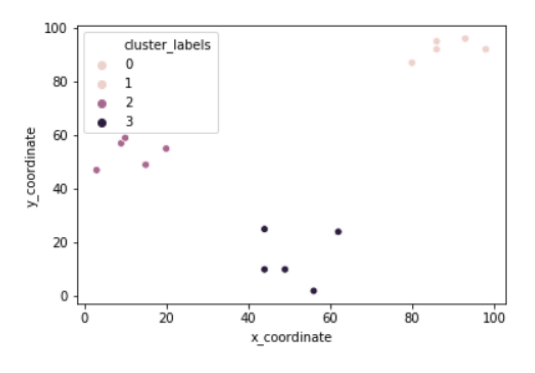

> the result of the seaborn scatterplot, shows the three clusters.

**K-means clustering algorithm**

1. First, a random cluster center is generated for each of the three clusters.

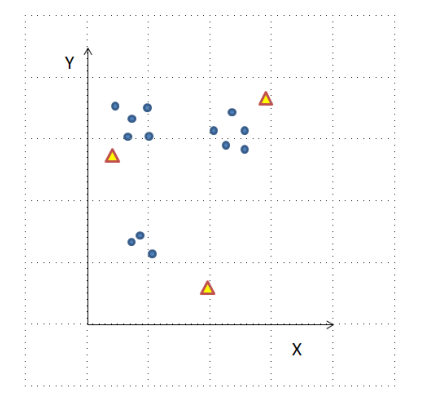

2. Next, the distance to these cluster centers is computed for each point to assign to the closest cluster.

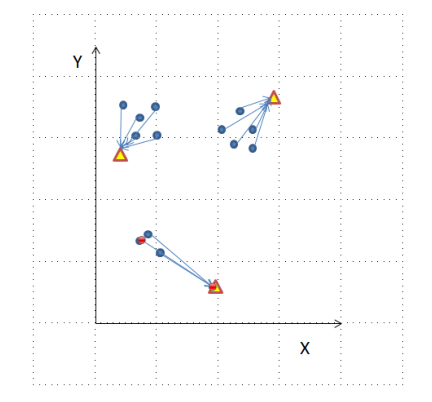

3. The cluster centers are recomputed. This iteration of assigning points to the recomputed cluster centers is performed a predefined number of times. Here, the clusters have been formed in the first iteration.

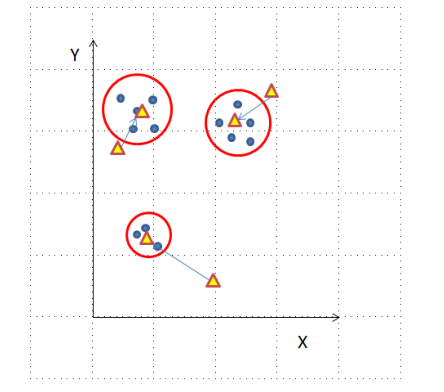

**K-means clustering in SciPy**

K-means clustering is implemented using methods kmeans and vq of ```scipy.cluster.vq```.

* The centroids of the clusters are computed using kmeans and cluster assignments for each point are done through vq

```
from scipy.cluster.vq import kmeans, vq
from matplotlib import pyplot as plt
import seaborn as sns, pandas as pd
import random

random.seed((1000,2000))

x_coordinates = [80.1, 93.1, 86.6, 98.5, 86.4, 9.5, 15.2, 3.4,
10.4, 20.3, 44.2, 56.8, 49.2, 62.5, 44.0]
y_coordinates = [87.2, 96.1, 95.6, 92.4, 92.4, 57.7, 49.4,
47.3, 59.1, 55.5, 25.6, 2.1, 10.9, 24.1, 10.3]
df = pd.DataFrame({'x_coordinate': x_coordinates, 'y_coordinate': y_coordinates})

centroids,_ = kmeans(df, 3)
df['cluster_labels'], _ = vq(df, centroids)
```
> the second argument in both methods is distortion, which we capture in a dummy variable

* plot the clusters using seaborn

```
sns.scatterplot(x='x_coordinate', y='y_coordinate',
hue='cluster_labels', data = df)

plt.show()
```

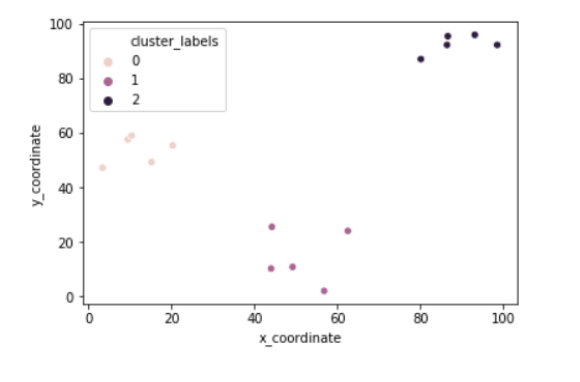

**hierarchical clustering**

form two clusters of the sightings using hierarchical clustering.

'x' and 'y' are columns of X and Y coordinates of the locations of sightings, stored in a Pandas data frame, df. The following are available for use: matplotlib.pyplot as plt, seaborn as sns, and pandas as pd

* Import the linkage and fcluster libraries.
* Use the linkage() function to compute distances using the ward method.
* Generate cluster labels for each data point with two clusters using the fcluster() function.
* Plot the points with seaborn and assign a different color to each cluster.

```
# Import linkage and fcluster functions
from scipy.cluster.hierarchy import linkage, fcluster

# Use the linkage() function to compute distance
Z = linkage(df, 'ward')

# Generate cluster labels
df['cluster_labels'] = fcluster(Z, 2, criterion='maxclust')

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()
```

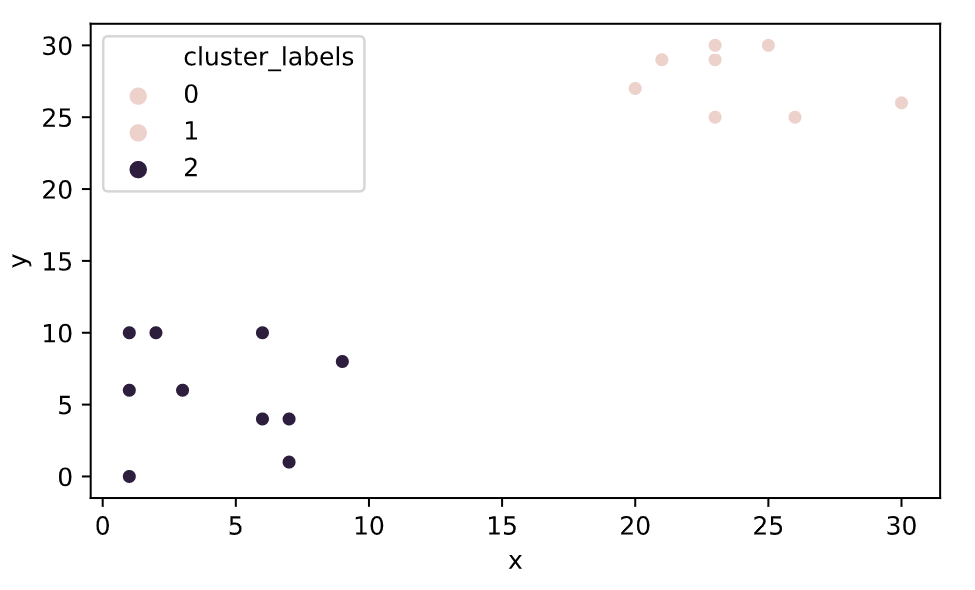

**k-means clustering**

orm clusters of the sightings using k-means clustering.

x and y are columns of X and Y coordinates of the locations of sightings, stored in a Pandas data frame, df. The following are available for use: matplotlib.pyplot as plt, seaborn as sns, and pandas as pd.

* Import the kmeans and vq functions.
* Use the kmeans() function to compute cluster centers by defining two clusters.
* Assign cluster labels to each data point using vq() function.
* Plot the points with seaborn and assign a different color to each cluster

```
# Import kmeans and vq functions
from scipy.cluster.vq import kmeans, vq

# Compute cluster centers
centroids,_ = kmeans(df, 2)

# Assign cluster labels
df['cluster_labels'], _ = vq(df, centroids)

# Plot the points with seaborn
sns.scatterplot(x='x', y='y', hue='cluster_labels', data=df)
plt.show()
```

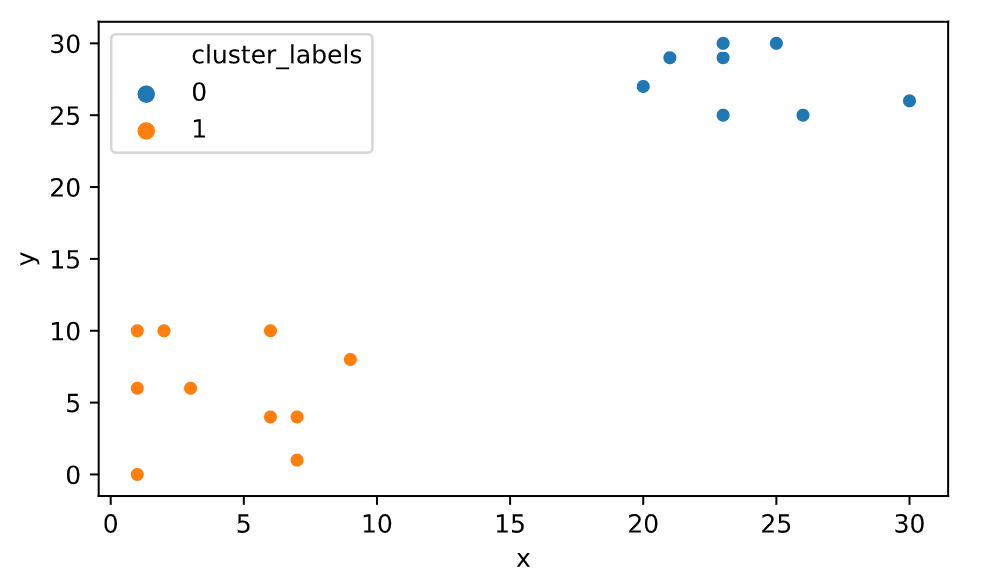

###Data preparation for cluster analysis

Now that you are familiar with the two basic clustering techniques, let us discuss an important step in processing data that we should apply before performing clustering.

*Why do we need to prepare data for clustering?*

 Imagine a situation where you have a set of variables with incomparable units  
 > such as the dimensions of a product and its price. 

 Even if variables have the same unit, they may be significantly different in terms of their scales and variances.

 For instance, the amount that one may spend on an inexpensive item like cereals is low as compared to traveling expenses. If we use data in this raw form, the results of clustering may be biased. The clusters formed may be dependent on one variable significantly more than the other. How do we account for these issues, then? We use a process called **normalization**.

*Normalization of data*

 It is a process by which we rescale the values of a variable with respect to standard deviation of the data.

 The resultant standard deviation post normalization is 1. The process of normalization is simple and achieved through **dividing a value by its standard deviation**. 

 A normalization library is available on the SciPy package, using the whiten method of the vq class. 

*  initiate the data to be normalized in a list and then use the whiten method, to transform. The array may be one or multi dimensional. 

> Note that, in the example, we use a one dimensional list. In case of a multi dimensional array or list of lists, whiten divides each value by the standard deviation of the column. The result of the whiten method is an array of the same dimensions.

```
from scipy.cluster.vq import whiten

data = [5, 1, 3, 3, 2, 3, 3, 8, 1, 2, 2, 3, 5]
scaled_data = whiten(data)

print(scaled_data)

[2.73, 0.55, 1.64, 1.64, 1.09, 1.64, 1.64, 4.36, 0.55, 1.09, 1.09, 1.64, 2.73]
```

**Illustration: normalization of data**

Let us look at a plot using the matplotlib library in Python to compare the results of the normalization process. 

* import the pyplot class of the matplotlib library in Python

```
# Import plotting library
from matplotlib import pyplot as plt
```

* initialized the two lists which contain the original and scaled data points. By default, pyplot plots line graphs.

```
# Initialize original, scaled data
plt.plot(data,
label="original")
plt.plot(scaled_data,
label="scaled")
```

* enable the legend in the graph and then display the plot. 

> Let us see how the plot looks like.

```
# Show legend and display plot
plt.legend()
plt.show()
```
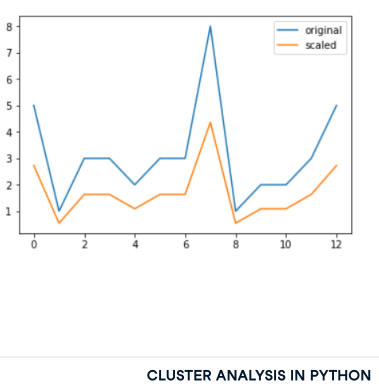




> The original and scaled lists have been plotted in blue and orange colors, respectively. The serial number of the points is in the x axis, whereas the value of the original and scaled data points is in the y axis. As you can see, the variation in the scaled data has been toned down from the original data. Interestingly, the trends remain similar to the original data though.

**Normalize basic list data**

try to normalize some data. goals_for is a list of goals scored by a football team in their last ten matches. Let us standardize the data using the whiten() function.

* Import the whiten function.
* Use the whiten() function to standardize the data.

```
# Import the whiten function
from scipy.cluster.vq import whiten

goals_for = [4,3,2,3,1,1,2,0,1,4]

# Use the whiten() function to standardize the data
scaled_data = whiten(goals_for)
print(scaled_data)
```

```[3.07692308 2.30769231 1.53846154 2.30769231 0.76923077 0.76923077
     1.53846154 0.         0.76923077 3.07692308]
```

**Visualize normalized data**

After normalizing your data, you can compare the scaled data to the original data to see the difference. The variables from the last exercise, goals_for and scaled_data are already available to you.

* Use the matplotlib library to plot the original and scaled data.
* Show the legend in the plot.
* Display the plot.

```
# Plot original data
plt.plot(goals_for, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

# Show the legend in the plot
plt.legend()

# Display the plot
plt.show()
```

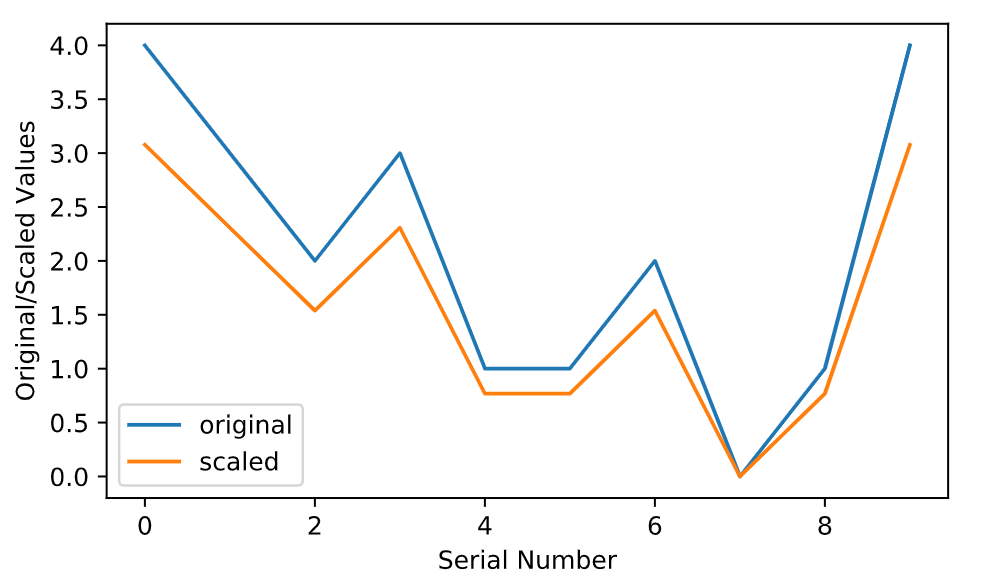

**Normalization of small numbers**

In earlier examples, you have normalization of whole numbers. In this exercise, you will look at the treatment of fractional numbers - the change of interest rates in the country of Bangalla over the years. For your use, matplotlib.pyplot is imported as plt.

* Scale the list rate_cuts, which contains the changes in interest rates.
* Plot the original data against the scaled data.

```
# Prepare data
rate_cuts = [0.0025, 0.001, -0.0005, -0.001, -0.0005, 0.0025, -0.001, -0.0015, -0.001, 0.0005]

# Use the whiten() function to standardize the data
scaled_data = whiten(rate_cuts)

# Plot original data
plt.plot(rate_cuts, label='original')

# Plot scaled data
plt.plot(scaled_data, label='scaled')

plt.legend()
plt.show()'
```

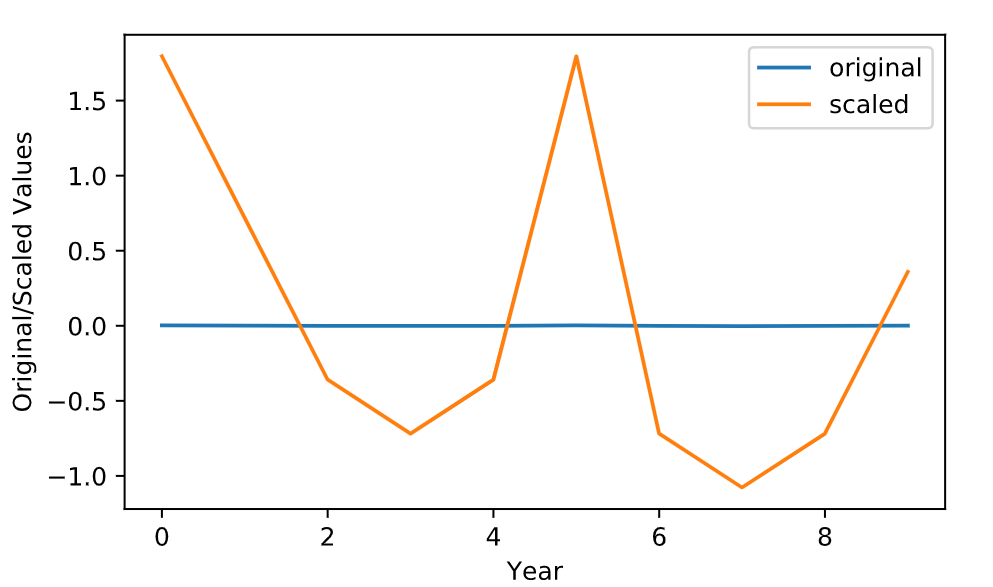

> Notice how the changes in the original data are negligible as compared to the scaled data

**FIFA 18: Normalize data**

The dataset that you are about to work on contains data on the 1000 top individual players in the game. You will explore various features of the data as we move ahead in the course. In this exercise, you will work with two columns, eur_wage, the wage of a player in Euros and eur_value, their current transfer market value.

The data for this exercise is stored in a Pandas dataframe, fifa. whiten from scipy.cluster.vq and matplotlib.pyplot as plt have been pre-loaded.

* Scale the values of eur_wage and eur_value using the whiten() function.

```
# Scale wage and value
fifa['scaled_wage'] = whiten(fifa['eur_wage'])
fifa['scaled_value'] = whiten(fifa['eur_value'])
```

* Plot the scaled wages and transfer values of players using the .plot() method of Pandas.

```
# Scale wage and value
fifa['scaled_wage'] = whiten(fifa['eur_wage'])
fifa['scaled_value'] = whiten(fifa['eur_value'])

# Plot the two columns in a scatter plot
fifa.plot(x='scaled_wage', y='scaled_value', kind='scatter')
plt.show()
```
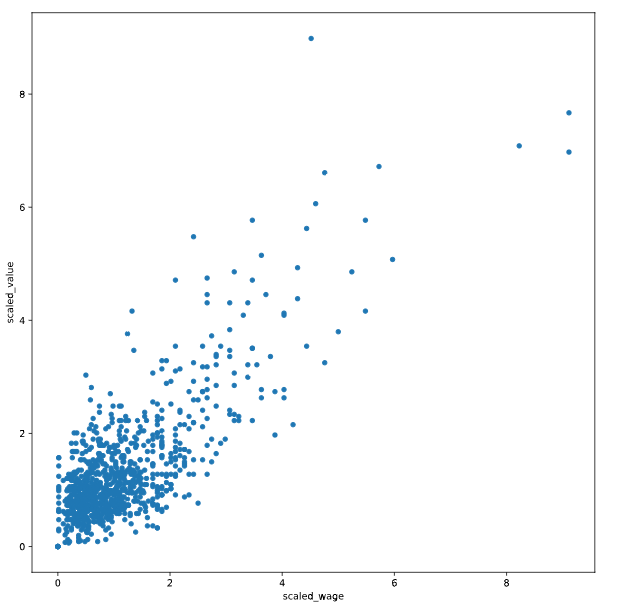
* Check the mean and standard deviation of the scaled data using the .describe() method of Pandas.

```
# Check mean and standard deviation of scaled values
print(fifa[['scaled_wage', 'scaled_value']].describe())
```

```
<script.py> output:
           scaled_wage  scaled_value
    count      1000.00       1000.00
    mean          1.12          1.31
    std           1.00          1.00
    min           0.00          0.00
    25%           0.47          0.73
    50%           0.85          1.02
    75%           1.41          1.54
    max           9.11          8.98
```

> As you can see the scaled values have a standard deviation of 1.

##Hierarchical Clustering

##K-Means Clustering


##Clustering in Real World
